# 초기 데이터 구성

In [4]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [5]:
import pandas as pd
from datetime import datetime, timedelta

xlsx = pd.read_excel('datas.xlsx', 
                    header = None, 
                    skiprows = 2,
                    engine = 'openpyxl')

datas = {};
for col in xlsx:
    if col > 6: # startcol 7
        datas[f'{xlsx[col][0]}-{xlsx[col][1]}-{xlsx[col][2]}'] = xlsx[col][3:]
        
def datetime_range(start, end, delta):
        current = start
        while current < end:
                yield current
                current += delta
dts = [dt.strftime('%Y%m%d %H:%M') for dt in
            datetime_range(datetime(2018,5,1,0), datetime(2019,5,1,0), timedelta(minutes = 15))]

df = pd.DataFrame(datas)

In [173]:
df = df.fillna(0)
sDatas = []

for idx in df['아파트1-104-1206']:
    sDatas.append(idx)

dts = [dt.strftime('%Y%m%d') for dt in
            datetime_range(datetime(2018,5,1,0), datetime(2019,5,1,0), timedelta(days = 1))]

sData = {}
dtIdx = 0
for idx in range(3,len(sDatas),96):
    sData[dts[dtIdx]] = pd.Series(sDatas[idx: idx + 96])
    dtIdx += 1
sDf = pd.DataFrame(sData)
sDf = sDf.fillna(0)
initDf = sDf.copy()
sDf = sDf.T
sDf
initDf

,20180501,20180502,20180503,20180504,20180505,20180506,20180507,20180508,20180509,20180510,...,20190421,20190422,20190423,20190424,20190425,20190426,20190427,20190428,20190429,20190430
0,0.085,0.051,0.037,0.064,0.081,0.097,0.052,0.086,0.068,0.053,...,0.058,0.020,0.012,0.008,0.022,0.029,0.007,0.075,0.019,0.022
1,0.084,0.050,0.046,0.074,0.054,0.096,0.051,0.085,0.036,0.052,...,0.073,0.007,0.007,0.008,0.024,0.025,0.007,0.065,0.024,0.023
2,0.085,0.050,0.088,0.085,0.052,0.101,0.032,0.084,0.046,0.052,...,0.053,0.007,0.007,0.007,0.014,0.023,0.007,0.062,0.015,0.008
3,0.084,0.051,0.051,0.084,0.041,0.105,0.044,0.052,0.054,0.052,...,0.039,0.007,0.010,0.024,0.007,0.007,0.007,0.065,0.007,0.006
4,0.084,0.050,0.050,0.065,0.032,0.107,0.051,0.051,0.055,0.052,...,0.044,0.017,0.025,0.023,0.007,0.008,0.025,0.075,0.007,0.007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.069,0.049,0.069,0.085,0.101,0.087,0.081,0.083,0.080,0.051,...,0.028,0.007,0.007,0.068,0.048,0.055,0.069,0.011,0.055,0.023
92,0.087,0.049,0.064,0.085,0.100,0.085,0.088,0.067,0.091,0.040,...,0.007,0.007,0.007,0.058,0.059,0.042,0.066,0.024,0.019,0.014
93,0.092,0.049,0.083,0.085,0.101,0.100,0.087,0.080,0.090,0.031,...,0.007,0.007,0.010,0.053,0.050,0.057,0.067,0.022,0.009,0.000
94,0.082,0.049,0.085,0.074,0.100,0.117,0.087,0.082,0.089,0.053,...,0.008,0.021,0.025,0.044,0.043,0.050,0.065,0.008,0.007,0.000


In [174]:
scaled = StandardScaler().fit_transform(sDf)
scaled

array([[ 0.36029058,  0.31860553,  0.35106608, ...,  0.42521556,
         0.2771231 , -0.14679687],
       [-0.12465585, -0.1437842 , -0.12777966, ..., -0.18437142,
        -0.18796646, -0.17490855],
       [-0.32433967, -0.19818299,  0.39211   , ...,  0.29762759,
         0.31940397,  0.23271079],
       ...,
       [ 0.21765927,  0.06021127,  0.03639602, ..., -0.56713534,
        -0.765805  , -0.75119796],
       [-0.58107602, -0.49737635, -0.60662539, ..., -0.75142908,
        -0.77989862, -0.75119796],
       [-0.53828662, -0.51097605, -0.70239454, ..., -0.87901705,
        -0.87855398, -0.84958884]])

In [175]:
pca = PCA(n_components=2)

pca.fit(scaled);
pca_columns = ['x', 'y'];
after_pca = pca.transform(scaled)
scaled.shape

sDf_pca = pd.DataFrame(after_pca, columns = pca_columns)
sDf_pca

,x,y
0,2.350971,0.756726
1,0.819896,1.361105
2,1.089495,1.553746
3,2.954181,0.238683
4,4.585859,4.067496
...,...,...
360,-5.504917,-1.470903
361,-2.810191,1.397020
362,-1.162364,0.603618
363,-5.447782,-0.962524


In [29]:
import matplotlib.pyplot as plt

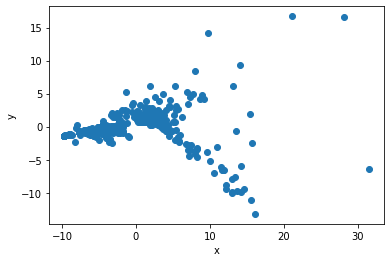

In [176]:
x_axis_data = sDf_pca['x']
y_axis_data = sDf_pca['y']

plt.scatter(x_axis_data, y_axis_data, marker='o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [36]:
from sklearn.cluster import KMeans

In [177]:
points = sDf.values
kmeans = KMeans(n_clusters=6).fit(points)
kmeans.cluster_centers_

array([[0.03136145, 0.02962651, 0.028     , 0.02660241, 0.02804819,
        0.02743373, 0.026     , 0.02574699, 0.02625301, 0.02550602,
        0.0266988 , 0.02566265, 0.02485542, 0.02542169, 0.02340964,
        0.02438554, 0.0236747 , 0.02371084, 0.02450602, 0.02374699,
        0.02333735, 0.02527711, 0.02549398, 0.0233253 , 0.02268675,
        0.02307229, 0.02291566, 0.01996386, 0.01996386, 0.0206988 ,
        0.02046988, 0.01940964, 0.01991566, 0.02054217, 0.02090361,
        0.02095181, 0.02172289, 0.02055422, 0.02078313, 0.02268675,
        0.02079518, 0.02214458, 0.0236506 , 0.02315663, 0.02336145,
        0.02421687, 0.02214458, 0.02386747, 0.0243494 , 0.0243253 ,
        0.02390361, 0.02413253, 0.02355422, 0.02598795, 0.02780723,
        0.02772289, 0.02513253, 0.02344578, 0.02440964, 0.02712048,
        0.02739759, 0.0263012 , 0.02540964, 0.02521687, 0.02673494,
        0.02801205, 0.02862651, 0.02849398, 0.02995181, 0.03106024,
        0.03656627, 0.04024096, 0.04356627, 0.05

In [73]:
import seaborn as sns

In [179]:
sDf_pca["cluster"] = kmeans.labels_
sDf_pca["date"] = sDf.index

sDf_pca;

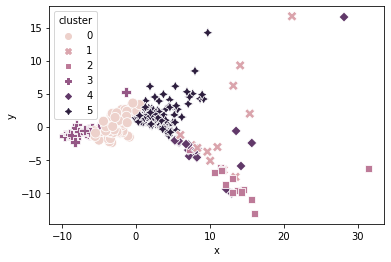

In [180]:
sns.scatterplot(x='x', y="y", hue="cluster", style="cluster", s = 100, data = sDf_pca)
plt.show()

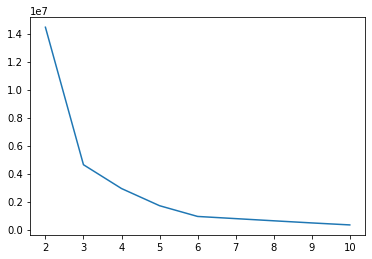

In [181]:
wcss = []
ks = []

for k in range(2,11):
    kmeans = KMeans(n_clusters = k, random_state=0).fit(sDf_pca)
    wcss.append(kmeans.inertia_)
    ks.append(k)
    
plt.plot(ks, wcss)

In [182]:
sDf_pca['cluster']

sDf_pca['date']

0      20180501
1      20180502
2      20180503
3      20180504
4      20180505
         ...   
360    20190426
361    20190427
362    20190428
363    20190429
364    20190430
Name: date, Length: 365, dtype: object

In [205]:
cluster = pd.DataFrame({"cluster": sDf_pca['cluster'], "date": sDf_pca['date']})
cluster

,cluster,date
0,5,20180501
1,5,20180502
2,5,20180503
3,5,20180504
4,5,20180505
...,...,...
360,0,20190426
361,0,20190427
362,0,20190428
363,0,20190429


In [204]:
sDf['date'] = dts
sDf

,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,date
20180501,0.085,0.084,0.085,0.084,0.084,0.084,0.084,0.084,0.072,0.065,...,0.084,0.085,0.083,0.066,0.069,0.087,0.092,0.082,0.050,20180501
20180502,0.051,0.050,0.050,0.051,0.050,0.050,0.050,0.046,0.030,0.043,...,0.050,0.050,0.049,0.049,0.049,0.049,0.049,0.049,0.048,20180502
20180503,0.037,0.046,0.088,0.051,0.050,0.044,0.029,0.044,0.050,0.048,...,0.065,0.072,0.085,0.084,0.069,0.064,0.083,0.085,0.077,20180503
20180504,0.064,0.074,0.085,0.084,0.065,0.065,0.086,0.084,0.074,0.064,...,0.081,0.080,0.080,0.084,0.085,0.085,0.085,0.074,0.065,20180504
20180505,0.081,0.054,0.052,0.041,0.032,0.052,0.053,0.045,0.030,0.041,...,0.105,0.098,0.101,0.101,0.101,0.100,0.101,0.100,0.099,20180505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20190426,0.029,0.025,0.023,0.007,0.008,0.008,0.013,0.024,0.020,0.007,...,0.065,0.071,0.062,0.052,0.055,0.042,0.057,0.050,0.016,20190426
20190427,0.007,0.007,0.007,0.007,0.025,0.021,0.007,0.007,0.007,0.007,...,0.057,0.056,0.064,0.071,0.069,0.066,0.067,0.065,0.083,20190427
20190428,0.075,0.065,0.062,0.065,0.075,0.077,0.059,0.054,0.054,0.054,...,0.066,0.057,0.029,0.008,0.011,0.024,0.022,0.008,0.007,20190428
20190429,0.019,0.024,0.015,0.007,0.007,0.024,0.023,0.008,0.007,0.014,...,0.062,0.047,0.046,0.049,0.055,0.019,0.009,0.007,0.007,20190429


In [169]:
initDf

,20180501,20180502,20180503,20180504,20180505,20180506,20180507,20180508,20180509,20180510,...,20190421,20190422,20190423,20190424,20190425,20190426,20190427,20190428,20190429,20190430
0,0.085,0.051,0.037,0.064,0.081,0.097,0.052,0.086,0.068,0.053,...,0.058,0.020,0.012,0.008,0.022,0.029,0.007,0.075,0.019,0.022
1,0.084,0.050,0.046,0.074,0.054,0.096,0.051,0.085,0.036,0.052,...,0.073,0.007,0.007,0.008,0.024,0.025,0.007,0.065,0.024,0.023
2,0.085,0.050,0.088,0.085,0.052,0.101,0.032,0.084,0.046,0.052,...,0.053,0.007,0.007,0.007,0.014,0.023,0.007,0.062,0.015,0.008
3,0.084,0.051,0.051,0.084,0.041,0.105,0.044,0.052,0.054,0.052,...,0.039,0.007,0.010,0.024,0.007,0.007,0.007,0.065,0.007,0.006
4,0.084,0.050,0.050,0.065,0.032,0.107,0.051,0.051,0.055,0.052,...,0.044,0.017,0.025,0.023,0.007,0.008,0.025,0.075,0.007,0.007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.069,0.049,0.069,0.085,0.101,0.087,0.081,0.083,0.080,0.051,...,0.028,0.007,0.007,0.068,0.048,0.055,0.069,0.011,0.055,0.023
92,0.087,0.049,0.064,0.085,0.100,0.085,0.088,0.067,0.091,0.040,...,0.007,0.007,0.007,0.058,0.059,0.042,0.066,0.024,0.019,0.014
93,0.092,0.049,0.083,0.085,0.101,0.100,0.087,0.080,0.090,0.031,...,0.007,0.007,0.010,0.053,0.050,0.057,0.067,0.022,0.009,0.000
94,0.082,0.049,0.085,0.074,0.100,0.117,0.087,0.082,0.089,0.053,...,0.008,0.021,0.025,0.044,0.043,0.050,0.065,0.008,0.007,0.000


In [200]:
cluster.T

date,20180501,20180502,20180503,20180504,20180505,20180506,20180507,20180508,20180509,20180510,...,20190421,20190422,20190423,20190424,20190425,20190426,20190427,20190428,20190429,20190430
cluster,5,5,5,5,5,5,5,5,5,5,...,0,3,0,3,0,0,0,0,0,3


In [206]:
merge_data = pd.merge(sDf, cluster)

In [207]:
merge_data

,0,1,2,3,4,5,6,7,8,9,...,88,89,90,91,92,93,94,95,date,cluster
0,0.085,0.084,0.085,0.084,0.084,0.084,0.084,0.084,0.072,0.065,...,0.085,0.083,0.066,0.069,0.087,0.092,0.082,0.050,20180501,5
1,0.051,0.050,0.050,0.051,0.050,0.050,0.050,0.046,0.030,0.043,...,0.050,0.049,0.049,0.049,0.049,0.049,0.049,0.048,20180502,5
2,0.037,0.046,0.088,0.051,0.050,0.044,0.029,0.044,0.050,0.048,...,0.072,0.085,0.084,0.069,0.064,0.083,0.085,0.077,20180503,5
3,0.064,0.074,0.085,0.084,0.065,0.065,0.086,0.084,0.074,0.064,...,0.080,0.080,0.084,0.085,0.085,0.085,0.074,0.065,20180504,5
4,0.081,0.054,0.052,0.041,0.032,0.052,0.053,0.045,0.030,0.041,...,0.098,0.101,0.101,0.101,0.100,0.101,0.100,0.099,20180505,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.029,0.025,0.023,0.007,0.008,0.008,0.013,0.024,0.020,0.007,...,0.071,0.062,0.052,0.055,0.042,0.057,0.050,0.016,20190426,0
361,0.007,0.007,0.007,0.007,0.025,0.021,0.007,0.007,0.007,0.007,...,0.056,0.064,0.071,0.069,0.066,0.067,0.065,0.083,20190427,0
362,0.075,0.065,0.062,0.065,0.075,0.077,0.059,0.054,0.054,0.054,...,0.057,0.029,0.008,0.011,0.024,0.022,0.008,0.007,20190428,0
363,0.019,0.024,0.015,0.007,0.007,0.024,0.023,0.008,0.007,0.014,...,0.047,0.046,0.049,0.055,0.019,0.009,0.007,0.007,20190429,0
